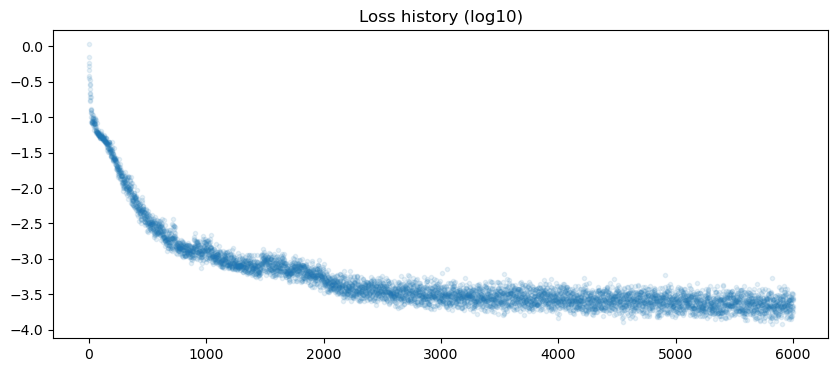

Training finished
 score: 0.07259
Evaluation finished


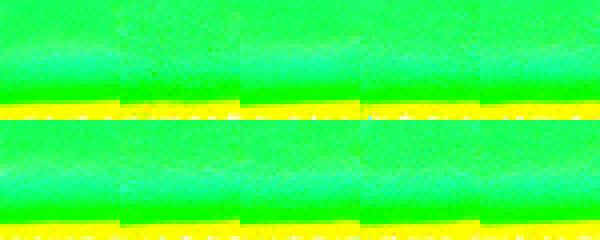

In [1]:
# install libraries
#%pip install moviepy>/dev/null

# imports
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay
from itertools import product
from os.path import join

# import functions
#%cd /kaggle/input/dgm-project-nca
from DataUtils import MedMNIST2d, load_data
from NCA import Parameter, NCAModel

# load data
#%cd /kaggle/input/medmnist
dataset = MedMNIST2d[4]
_, data = load_data(dataset)

# train model
#%cd /kaggle/working
hyperparameters = {
    'learning_rate': [8e-3, 3e-3, 1e-3, 4e-4],
    'channel_n': [8, 16, 24],
    'seed_type': ['point', 'noise'],
}
for i, values in enumerate(product(*hyperparameters.values())):
    hp = dict(zip(hyperparameters.keys(), values))
    nca = NCAModel(Parameter(
        channel_n = hp['channel_n'],
        seed_type = hp['seed_type'],
        learning_rate = hp['learning_rate'],
        learning_rate_schedule = PiecewiseConstantDecay([2000], [hp['learning_rate'], 0.1*hp['learning_rate']]),
    ), identifier = join('%sMNIST' % dataset, 'Run%02d' % (i+1)))
    nca.train(train_data=data['train'], validation_data=data['val'])
    _ = nca.sample(n=10, log_samples='samples', samples_w=5)
    _ = nca.sample(n=1, log_sampling='growth')
